# Title- Titanic: Machine Learning from Disaster

### Competition Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

#### Practice Skills
###### Binary classification 
---

### Overview
The data has been split into two groups:

training set (train.csv)
test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

----

### Data Dictionary

<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

 


---
### Variable Notes
<p><b>pclass</b>: A proxy for socio-economic status (SES)<br> 1st = Upper<br> 2nd = Middle<br> 3rd = Lower<br><br> <b>age</b>: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5<br><br> <b>sibsp</b>: The dataset defines family relations in this way...<br> Sibling = brother, sister, stepbrother, stepsister<br> Spouse = husband, wife (mistresses and fiancés were ignored)<br><br> <b>parch</b>: The dataset defines family relations in this way...<br> Parent = mother, father<br> Child = daughter, son, stepdaughter, stepson<br> Some children travelled only with a nanny, therefore parch=0 for them.</p>

---
### 1.Prepare Problem
#### a.Load libraries
#### b.Load dataset
##### for this problem we will be loading training set and test  from two files as given by kaggle 

In [1]:
import os
import math
import datetime

from mlsettings.settings import load_app_config, get_datafolder_path
from mltools.mlcommon import load_data

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
 
% matplotlib inline 
from numpy import set_printoptions
set_printoptions(precision=4)
pd.set_option('display.width', 120)
pd.set_option('precision', 4)
sns.set_style("white")
#flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
#sns.set_palette("husl")
#sns.set_palette(flatui)

In [2]:
DIRECTORY="kaggle_titanic"
TRAIN_FILE ='train.csv'
TEST_FILE = 'test.csv'
RESPONSE = 'Survived'
load_app_config()
input_path = get_datafolder_path()

In [3]:
def load_dataset(filename=TRAIN_FILE,response=RESPONSE):
    """Performs loading of dataset
    Parameters
    ----------
    filename: string
        Name of the file to load
    response: string
        response column in the dataset 
    Returns
    ----------
    input_dataset: pandas.DataFrame
    feature_columns: list of feature columns
    response_column: response column
    continuous_vars: list of continuous  variables
    categorical_vars: list of categorical variables   
    """
    input_file = os.path.join(input_path, DIRECTORY, filename)
    input_dataset = load_data(input_file)
    print(" input file is :{0} loaded.".format(input_file))
     
    try:
        continuous_vars = input_dataset.describe().columns.values.tolist()
        print("Continous Variables")
        print(continuous_vars)
    except ValueError:
        print("No continous variables")
    
    try:
        categorical_vars = input_dataset.describe(include=["object"]).columns.values.tolist()
        print("Categorical Variables")
        print(categorical_vars)
    except ValueError:
        print("No categorical variables")
        categorical_vars = None
    
    response_column =  [col for col in input_dataset.columns if response == col]
    feature_columns =  [col for col in input_dataset.columns if response != col]
      
    return  input_dataset,feature_columns,response_column,continuous_vars,categorical_vars


In [4]:
test_X =[]
test_y =[]

train_dataset,feature_columns,response_column,continuous_vars,categorical_vars = load_dataset(filename=TRAIN_FILE,response=RESPONSE)
train_X = train_dataset[feature_columns]
train_y = train_dataset[response_column]

test_dataset,tfeature_columns,tresponse_column,tcontinuous_vars,tcategorical_vars = load_dataset(filename=TEST_FILE,response=RESPONSE)

if feature_columns:
    test_X = test_dataset[tfeature_columns]

if response_column:
    test_y = test_dataset[tfeature_columns]
   

 input file is :D:\DataSource\kaggle_titanic\train.csv loaded.
Continous Variables
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical Variables
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
 input file is :D:\DataSource\kaggle_titanic\test.csv loaded.
Continous Variables
['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical Variables
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [5]:
def display_data_descriptives(input_dataset,X,feature_columns,y,response_column):
    print("<{0} {1} {0}>".format("="*40,"info"))
    print(input_dataset.info())
    print("<{0} {1} {0}>".format("="*40,"feature columns"))
    print(feature_columns)
    print("<{0} {1} {0}>".format("="*40,"response"))
    print(response_column)
    print("<{0} {1} {0}>".format("="*40,"Descriptive Statistics -X"))
    print(X.describe())
    print("<{0} {1} {0}>".format("="*40,"Descriptive Statistics -y"))
    print(y.describe())
    print("<{0} {1} {0}>".format("="*40,"value_count -y"))
 
    print(y.groupby(response_column)[response_column].count())
    
display_data_descriptives(train_dataset,train_X,feature_columns,train_y,response_column)
train_dataset.head() 

<======================================== info ========================================>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
<======================================== feature columns ========================================>
['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
<======================================== response ========================================>
['Survived']
<=========

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Continuous features - Univariate Analysis 


In [7]:
'''

i=0
fig = plt.figure(figsize=(3,4),dpi=100)
ax = fig.add_subplot(1, 1, 1)
sns.distplot(train_dataset[train_dataset['Age'].notnull()]['Age'],ax=ax ,kde =False)
sns.despine()
plt.tight_layout()
plt.show()
'''
continuous_features =['Age', 'SibSp', 'Parch', 'Fare']
def dist_plots(train_dataset,continuous_features):
    fig = plt.figure(figsize=(12,10),dpi=200)
    size =len(continuous_features)
     
    for i in range(size):
        ax = fig.add_subplot(3, 2, i+1)
        sns.distplot(train_dataset[train_dataset[continuous_features[i]].notnull()][continuous_features[i]],ax=ax ,
                     kde =False,hist_kws=dict(alpha=1))
        sns.despine()
    plt.tight_layout()
    plt.show()

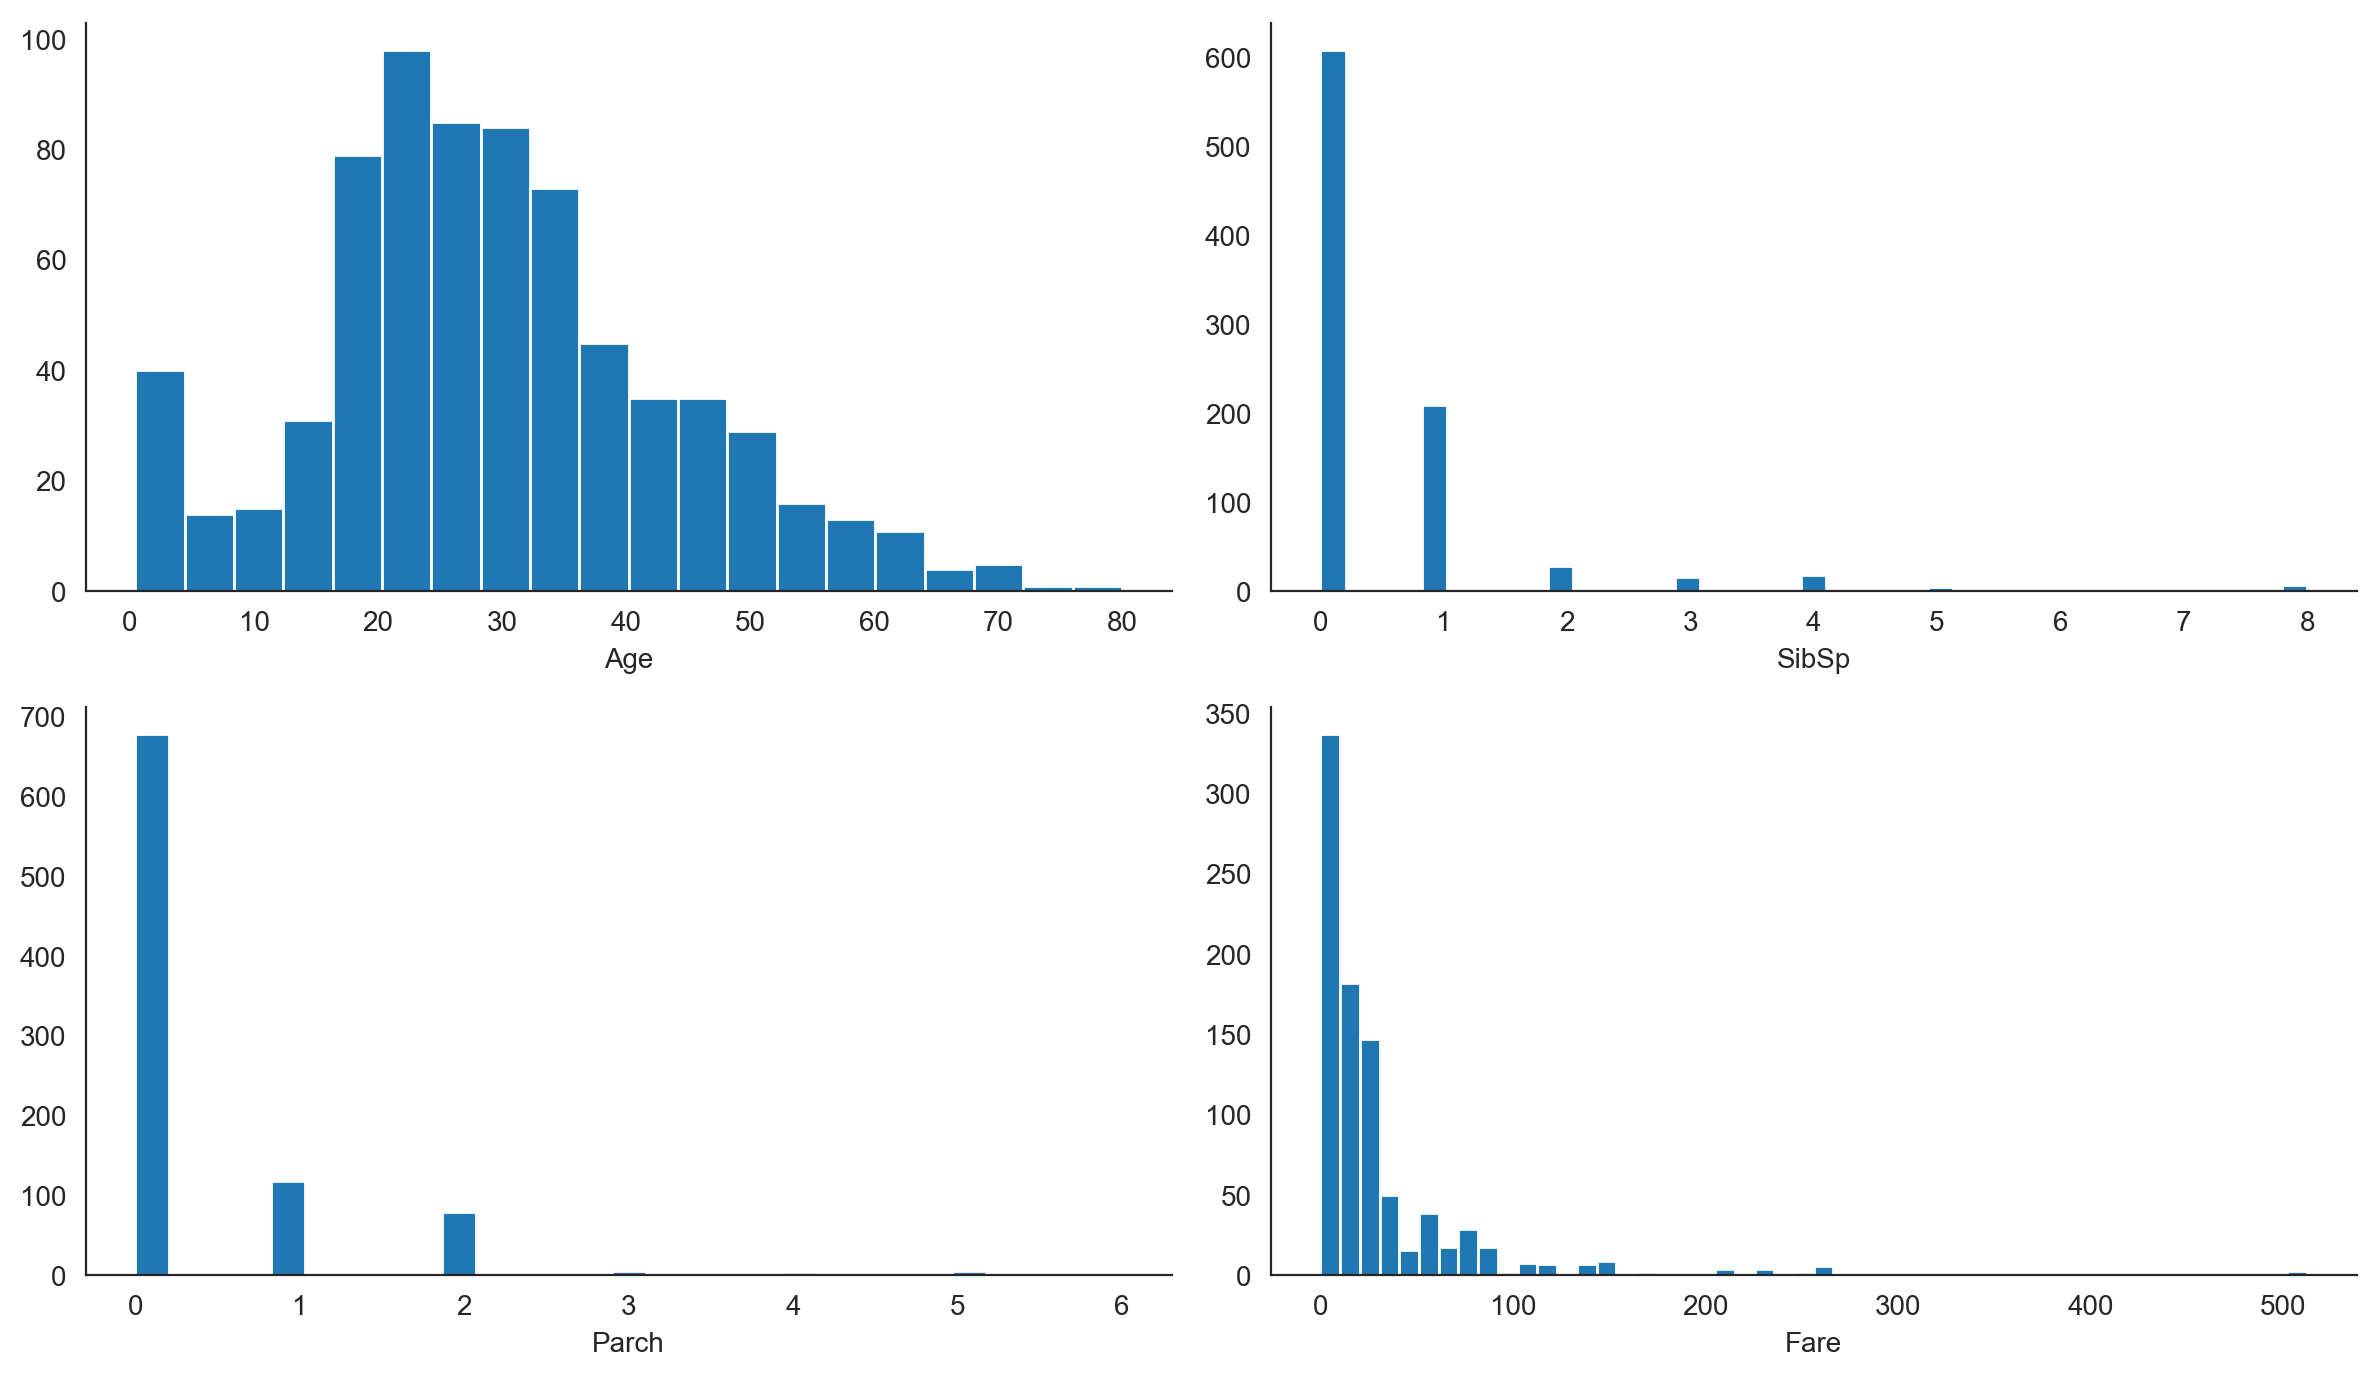

In [8]:
dist_plots(train_dataset,continuous_features)

In [9]:
check_null = train_dataset.isnull().sum()[train_dataset.isnull().sum()>0] 
train_dataset['Cabin'].fillna('X' ,inplace=True)
first_char = lambda x : str(x)[0]
train_dataset['Cabin'] = train_dataset['Cabin'].apply(first_char)

In [10]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X,S


In [11]:
survived_cabin =pd.DataFrame(train_dataset.groupby(['Cabin','Survived'])['PassengerId'].agg({'count'})).reset_index()
survived_cabin['log_count']=np.log(survived_cabin['count'])


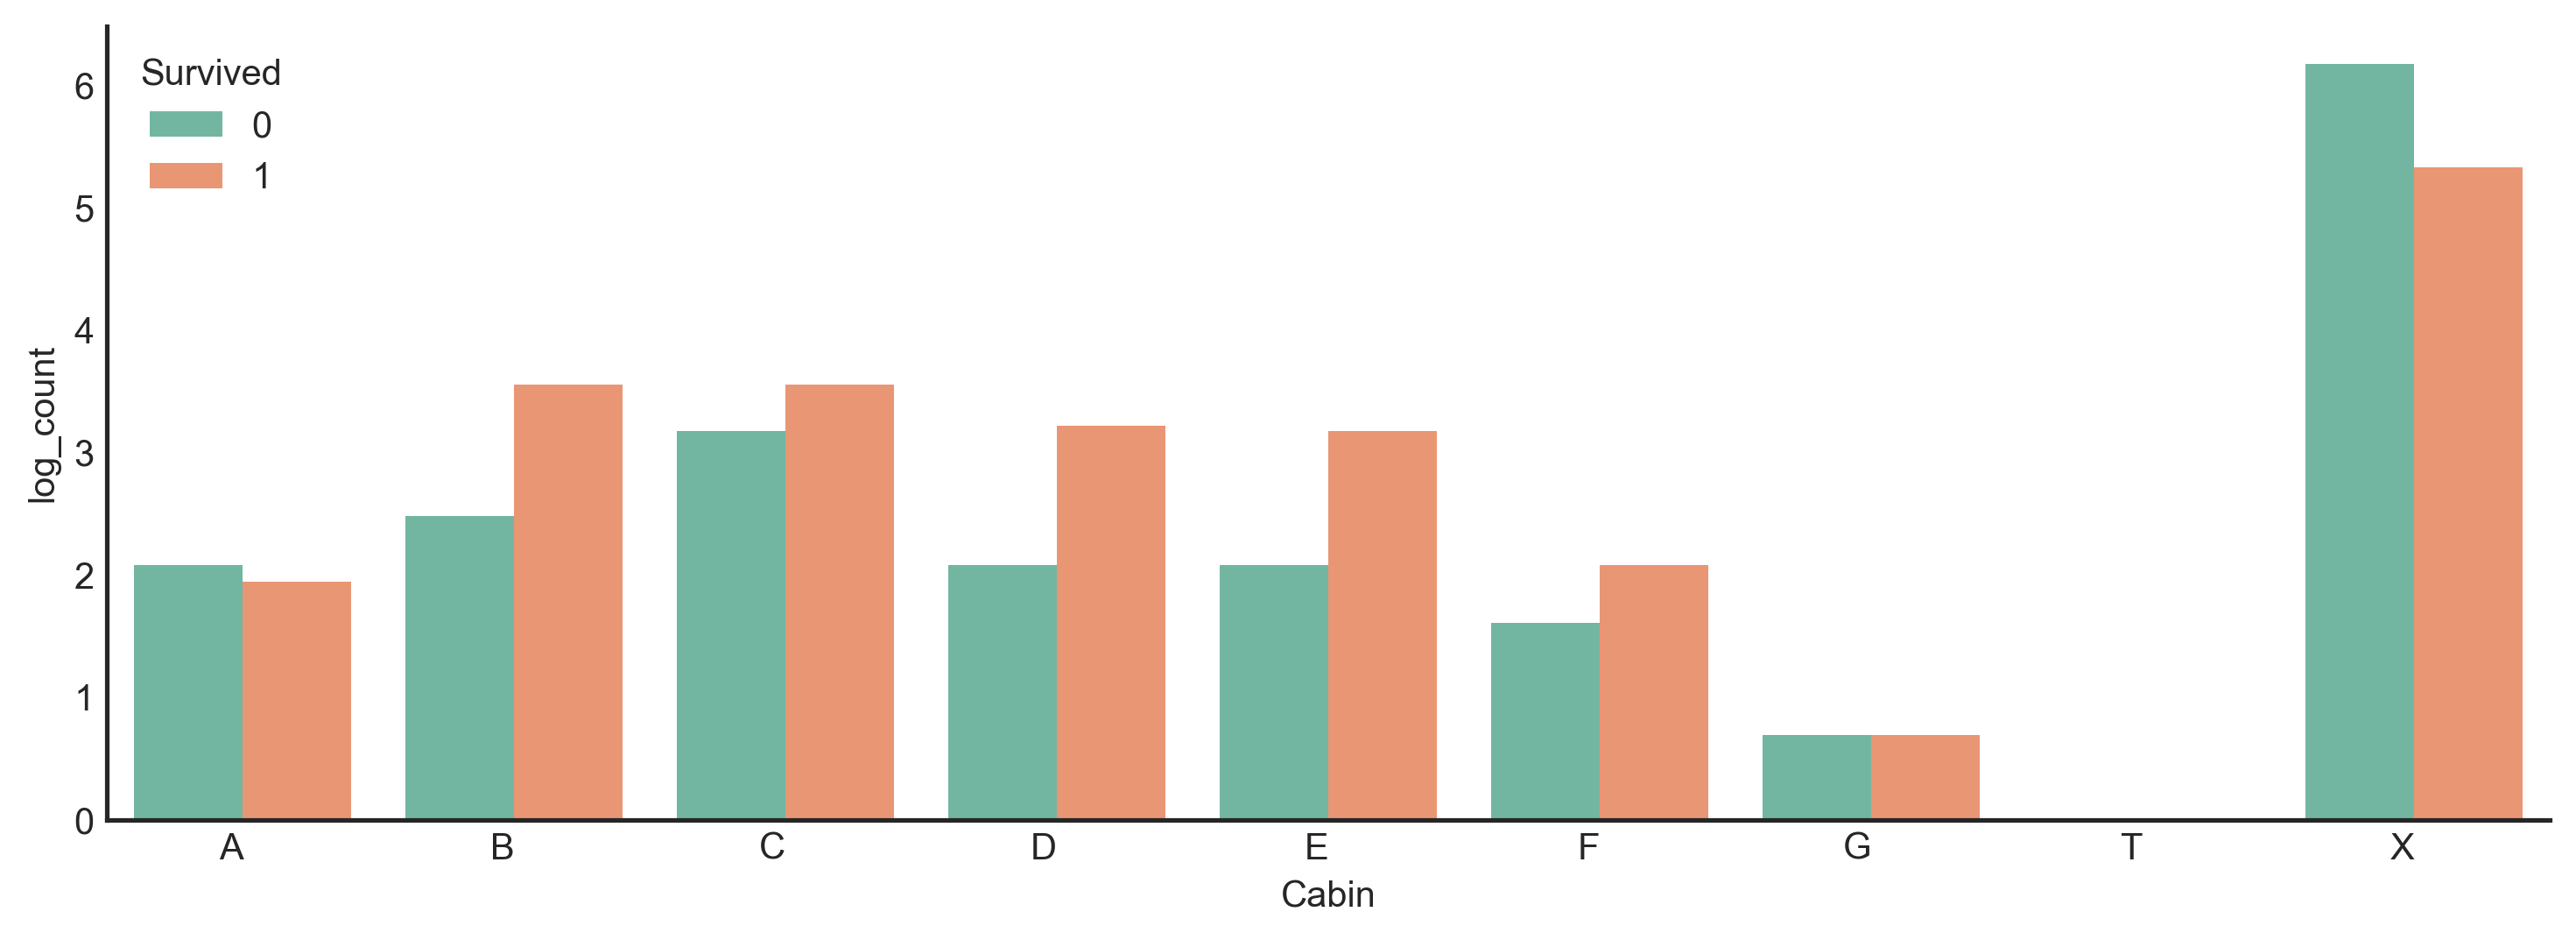

In [45]:
survived_cabin = survived_cabin.sort_values(by="Cabin",ascending=True)
fig = plt.figure(figsize=(12,4),dpi=300)
ax = fig.gca()
sns.barplot(data=survived_cabin,x="Cabin",y="log_count",ax=ax, hue ='Survived',palette ='Set2')
ax.set_xticklabels(ax.get_xticklabels(),ha='right')
sns.despine()

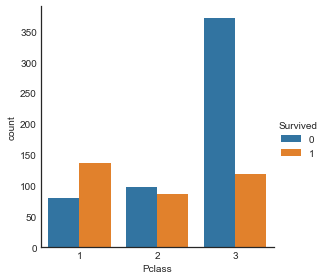

In [46]:
survived_class =pd.DataFrame(train_dataset.groupby(['Survived','Pclass'])['PassengerId'].agg({'count'})).reset_index()
survived_class['log_count']=np.log(survived_age['count'])
g = sns.factorplot(x="Pclass", y="count", hue='Survived' ,data=survived_class , kind="bar",ci=None)